# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from config import api_key
from citipy import citipy
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lng_list = []
cities = []

# Generate Latitudes
lat = np.random.uniform(lat_range[0], lat_range[1],size= 1500)
lng = np.random.uniform(lng_range[0], lng_range[1],size= 1500)
lat_lng_list = zip(lat, lng)

for lat_lng in lat_lng_list:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + api_key + "&q=" + "London"
#result = requests.get(query_url).json()
#result

In [7]:
data= []
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q=" 
#print(query_url)
for city in cities[:50]:
    result = requests.get(query_url+city).json()
    counter = counter + 1
    #print(result)
    try:
        lat = result["coord"]["lat"]
        lng = result["coord"]["lon"]
        temp_max = result["main"]["temp_max"]
        humidity = result["main"]["humidity"]
        cloudiness = result["clouds"]["all"]
        wind_speed = result["wind"]["speed"]
        country = result["sys"]["country"]
        date = result["dt"]
        data.append([city, lat, lng, temp_max, humidity, cloudiness, wind_speed, country, date])
        print(f"{counter} {city}")
        #print(city)
        time.sleep(1)
        
    except:
        print("City not found")

1 quatre cocos
2 pozoblanco
3 hithadhoo
City not found
5 lavrentiya
6 khatanga
City not found
8 nikolskoye
9 port elizabeth
10 ravar
11 qaanaaq
12 marawi
13 busselton
14 vaini
15 dunedin
16 ribeira grande
City not found
18 san carlos de bariloche
City not found
20 chokurdakh
21 victoria
22 mehamn
23 ushuaia
24 punta arenas
25 jackson
26 san juan
27 albany
28 carballo
29 tuatapere
30 kathu
City not found
32 bredasdorp
33 leningradskiy
34 rikitea
35 avarua
36 arraial do cabo
37 mar del plata
38 pevek
39 alofi
40 takoradi
41 longyearbyen
42 mataura
43 deputatskiy
44 vao
45 bluff
46 bustamante
47 atuona
48 hermanus
49 tuktoyaktuk
50 dayong


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df = pd.DataFrame(data, columns = ["city", "lng", "lat", "temp_max", "humidity", "cloudiness", "wind_speed", "country", "date"])
city_df

,city,lng,lat,temp_max,humidity,cloudiness,wind_speed,country,date
0,quatre cocos,-20.21,57.76,24.44,78,40,3.60,MU,1603076177
1,pozoblanco,38.38,-4.85,12.00,62,11,1.00,ES,1603076460
2,hithadhoo,-0.60,73.08,28.31,75,58,5.77,MV,1603076461
3,lavrentiya,65.58,-171.00,1.99,86,17,2.15,RU,1603076181
4,khatanga,71.97,102.50,-13.10,89,0,3.75,RU,1603076182
5,nikolskoye,59.70,30.79,2.00,89,40,4.00,RU,1603076184
6,port elizabeth,-33.92,25.57,13.00,93,63,1.13,ZA,1603076185
7,ravar,31.27,56.81,9.32,32,0,0.99,IR,1603076187
8,qaanaaq,77.48,-69.36,-2.93,87,49,3.08,GL,1603076188
9,marawi,8.00,124.29,27.78,80,97,1.79,PH,1603076189


In [12]:
city_df.describe()

,lng,lat,temp_max,humidity,cloudiness,wind_speed,date
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,8.948889,13.484667,13.050000,76.644444,50.133333,4.194444,1.603076e+09
std,44.921360,112.611349,12.389785,16.551786,37.804281,2.963377,9.150107e+01
min,-54.800000,-175.200000,-13.100000,28.000000,0.000000,0.450000,1.603076e+09
25%,-33.650000,-70.920000,2.680000,74.000000,17.000000,2.150000,1.603076e+09
50%,4.880000,19.230000,13.330000,80.000000,45.000000,3.300000,1.603076e+09
75%,43.210000,115.330000,24.440000,87.000000,90.000000,5.770000,1.603076e+09
max,78.220000,178.420000,29.440000,98.000000,100.000000,12.900000,1.603076e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_df["humidity"]>100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
Name: humidity, dtype: bool

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [13]:
city_df.to_csv("Output_Data/cities.csv", index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

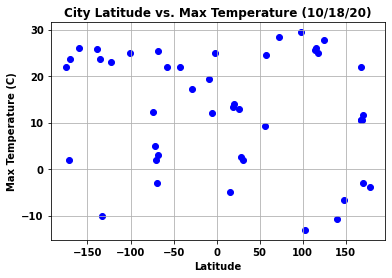

In [17]:
# Create the Scatter Plot
plt.scatter(city_df["lat"], city_df["temp_max"], facecolor= "blue")
plt.title("City Latitude vs. Max Temperature (10/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
#plt.savefig(Images/CityLatitudevsMaxTemperature.png)

## Latitude vs. Humidity Plot

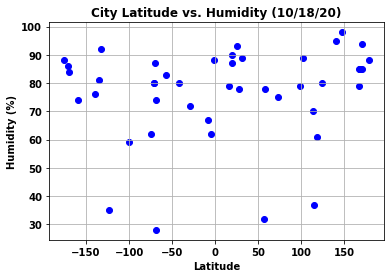

In [18]:
# Create the Scatter Plot
plt.scatter(city_df["lat"], city_df["humidity"], facecolor= "blue")
plt.title("City Latitude vs. Humidity (10/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.savefig(Images/CityLatitudevsHumidity.png)

## Latitude vs. Cloudiness Plot

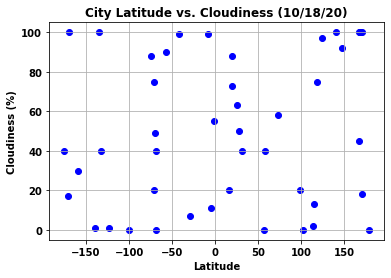

In [19]:
# Create the Scatter Plot
plt.scatter(city_df["lat"], city_df["cloudiness"], facecolor= "blue")
plt.title("City Latitude vs. Cloudiness (10/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.savefig(Images/CityLatitudevsCloudiness.png)

## Latitude vs. Wind Speed Plot

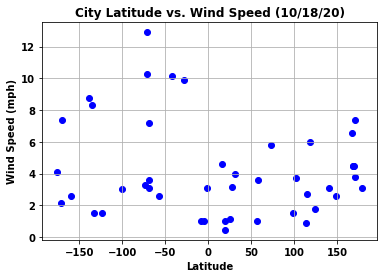

In [20]:
# Create the Scatter Plot
plt.scatter(city_df["lat"], city_df["wind_speed"], facecolor= "blue")
plt.title("City Latitude vs. Wind Speed (10/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.savefig(Images/CityLatitudevsWindSpeed.png)

## Linear Regression

In [21]:
# Create a northern and southern hemisphere DataFrame
northern_hem = city_df.loc[city_df["lat"]>= 0]
southern_hem = city_df.loc[city_df["lat"]< 0]

In [25]:
def linear_regression(x, y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0], 2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x, y)
    plt.plot (x, regress_values, "r-")
    return line_eq

# Annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.06


Text(0, 0.5, 'Max Temp (C)')

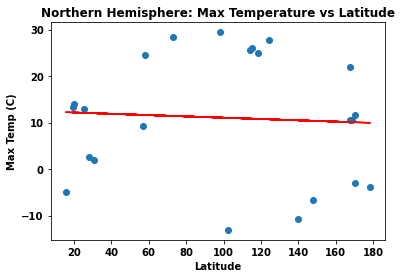

In [30]:
equation = linear_regression(northern_hem["lat"], northern_hem["temp_max"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere: Max Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
#plt.savefig(Images/NorthernMaxTempvsLatitude.png)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


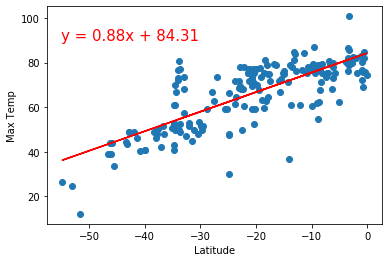

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


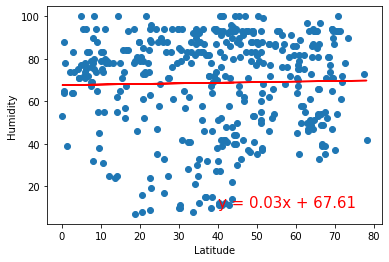

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


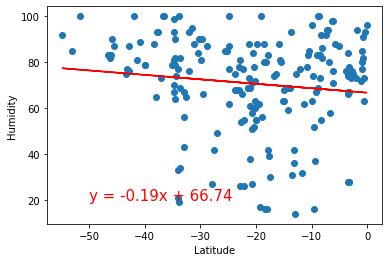

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


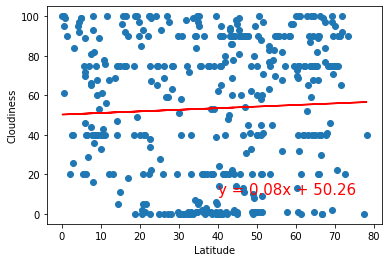

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


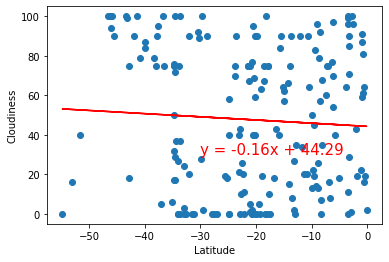

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


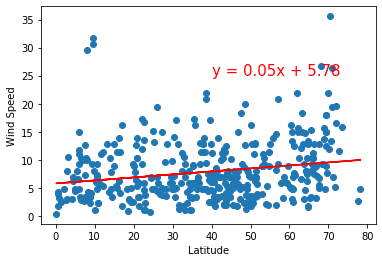

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


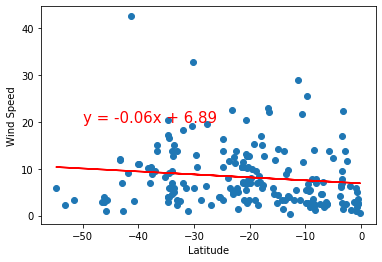